The degree of a weighted vertex is calculated by adding up the weights of all the edges connected to it.


The clustering coefficient is then calculated as the ratio of the total value of closed triplets 
(where all three nodes are interconnected) to the total value of all triplets (both open and closed).

Reference: https://blogs.cornell.edu/info2040/2011/09/15/clustering-coefficients-in-weighted-complex-networks/

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from tqdm import tqdm
def load_weighted_edge_list(file_path):
    edges = []
    nodes = set()
    print("Loading weight edges")
    with open(file_path, 'r') as file:
        for line in tqdm(file):
            if line.startswith('#') or not line.strip():
                continue
            u, v, weight = line.split(',')
            u, v = int(u), int(v)
            weight = float(weight)
            edges.append((u, v, weight))
            nodes.update([u, v])
    return edges, nodes

def compute_strengths_and_degrees(edges, nodes):
    strength = defaultdict(float)
    degree = defaultdict(int)
    print("Computing strengths and degrees")
    for u, v, weight in tqdm(edges):
        strength[u] += weight
        strength[v] += weight
        degree[u] += 1
        degree[v] += 1
    return strength, degree

def compute_weighted_clustering_coefficient(edges, nodes, strength, degree):
    adj_matrix = defaultdict(lambda: defaultdict(float))
    print("Computing adj matrix")
    for u, v, weight in tqdm(edges):
        adj_matrix[u][v] = weight
        adj_matrix[v][u] = weight  

    clustering_coeffs = {}
    print("Computing clustering coefficients")
    for i in tqdm(nodes):
        if degree[i] < 2:
            clustering_coeffs[i] = 0.0
            continue
        neighbors = adj_matrix[i].keys()
        total = 0.0
        for j in neighbors:
            for k in neighbors:
                if j != k:
                    total += (adj_matrix[i][j] + adj_matrix[i][k]) / 2 * adj_matrix[j][k]
        clustering_coeffs[i] = total / (strength[i] * (degree[i] - 1))
    return clustering_coeffs

def plot_weighted_degree_distribution(strength):
    strengths = list(strength.values())
    unique, counts = np.unique(strengths, return_counts=True)
    plt.figure()
    plt.plot(unique, counts, 'bo-')
    plt.xlabel('Weighted Degree (Strength)')
    plt.ylabel('Frequency')
    plt.title('Weighted Degree Distribution')
    plt.grid(True)
    plt.savefig("weighted_degree_distribution.png")
    plt.show()

def plot_clustering_coefficient_vs_degree(clustering_coeffs, degree):
    degrees = list(degree.values())
    clustering_values = list(clustering_coeffs.values())
    plt.figure()
    plt.scatter(degrees, clustering_values, alpha=0.5)
    plt.xlabel('Degree')
    plt.ylabel('Weighted Clustering Coefficient')
    plt.title('Clustering Coefficient vs Degree')
    plt.grid(True)
    plt.savefig("clustering_coefficient_vs_degree.png")
    plt.show()


file_path = 'Q3_bio_CE_LC.csv' 
edges, nodes = load_weighted_edge_list(file_path)
print("Number of nodes: ",len(nodes))
print("Number of edges: ",len(edges))

Loading weight edges


1648it [00:00, 194885.90it/s]

Number of nodes:  1387
Number of edges:  1648


Computing strengths and degrees


100%|██████████| 1648/1648 [00:00<00:00, 361026.48it/s]


Computing adj matrix


100%|██████████| 1648/1648 [00:00<00:00, 275354.06it/s]


Computing clustering coefficients


100%|██████████| 1387/1387 [01:17<00:00, 17.88it/s] 


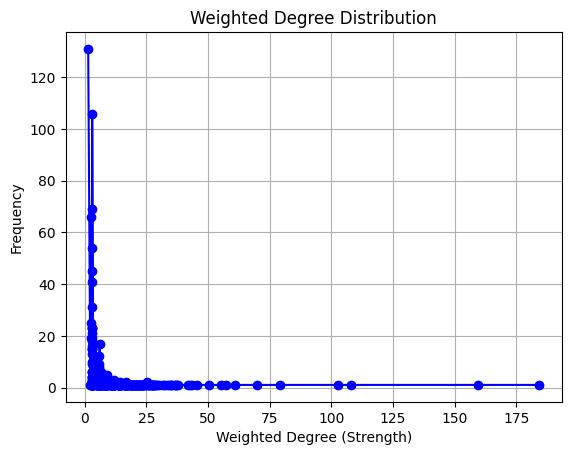

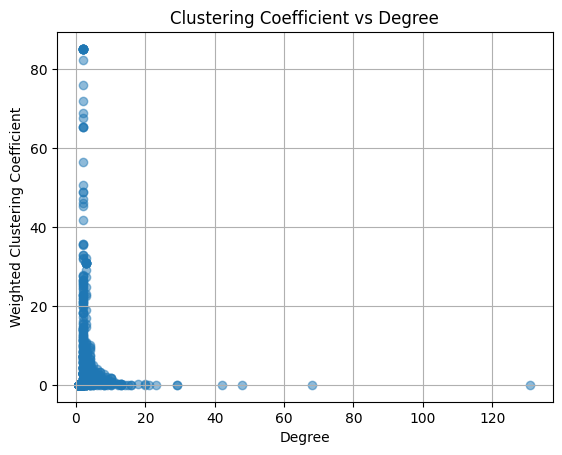

In [2]:
strength, degree = compute_strengths_and_degrees(edges, nodes)
clustering_coeffs = compute_weighted_clustering_coefficient(edges, nodes, strength, degree)
plot_weighted_degree_distribution(strength)
plot_clustering_coefficient_vs_degree(clustering_coeffs, degree)